<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EC%9E%AC%EA%B0%80%EC%9A%94%EC%96%91%EC%8B%9C%EC%84%A4%EB%A1%9C_%EC%9A%94%EC%96%91%EC%8B%9C%EC%84%A4%EC%9D%98_%EC%88%98_%EC%98%88%EC%B8%A1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 재가요양시설로 요양시설의 수 예측

구글 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#구글 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


판다스 함수 호출 및 데이터 로드, 한글 인코딩

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/2022년_9월_시군구별_장기요양기관_현황.CSV", encoding = "cp949")
df

# 판다스 불러오고 csv파일을 한글 인코딩하고 df에 입력

,시도,노인요양시설,공동생활가정,방문요양,방문목욕,주야간보호,복지용구
0,서울특별시,5,3.0,92,71.0,17.0,18.0
1,서울특별시,9,13.0,111,102.0,19.0,20.0
2,서울특별시,8,23.0,96,81.0,22.0,9.0
3,서울특별시,20,14.0,185,144.0,31.0,30.0
4,서울특별시,10,19.0,120,103.0,26.0,13.0
...,...,...,...,...,...,...,...
245,경상남도,10,4.0,54,33.0,9.0,4.0
246,경상남도,9,NaN,25,19.0,12.0,NaN
247,경상남도,6,NaN,23,13.0,7.0,4.0
248,제주특별자치도,19,2.0,24,19.0,20.0,4.0


기술통계 및 null값 확인과 제거


In [ ]:
df.info()

# df 정보 불러오기기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    int64  
 2   공동생활가정  221 non-null    float64
 3   방문요양    250 non-null    int64  
 4   방문목욕    248 non-null    float64
 5   주야간보호   248 non-null    float64
 6   복지용구    239 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.8+ KB


In [ ]:
df.isnull().sum()

# df null값 확인

시도         0
노인요양시설     0
공동생활가정    29
방문요양       0
방문목욕       2
주야간보호      2
복지용구      11
dtype: int64

In [ ]:
df.fillna(0, inplace = True)

# df null값 삭제

In [ ]:
df.isnull().sum()

# df null값 삭제됐는지 확인

시도        0
노인요양시설    0
공동생활가정    0
방문요양      0
방문목욕      0
주야간보호     0
복지용구      0
dtype: int64

In [ ]:
df.describe()

# df 기술통계

,노인요양시설,공동생활가정,방문요양,방문목욕,주야간보호,복지용구
count,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,17.248000,7.172000,66.61600,46.684000,20.052000,7.892000
std,18.427174,8.699722,47.32631,36.347499,15.023185,6.740778
min,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000
25%,6.000000,1.250000,29.00000,19.000000,9.000000,2.250000
50%,11.500000,4.000000,55.50000,35.000000,17.000000,6.000000
75%,21.000000,9.000000,92.00000,66.750000,27.750000,12.000000
max,129.000000,55.000000,236.00000,199.000000,88.000000,38.000000


박스플롯으로 이상치 확인

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc3e024cd0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fbc3e005970>, <matplotlib.lines.Line2D object at 0x7fbc3e005cd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fbc3df9f070>, <matplotlib.lines.Line2D object at 0x7fbc3df9f3d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fbc3e005610>], 'medians': [<matplotlib.lines.Line2D object at 0x7fbc3df9f730>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fbc3df9fa30>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_

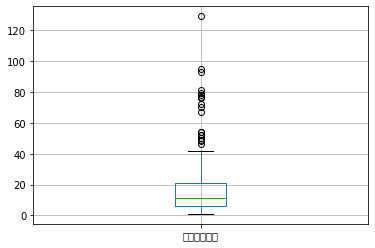

In [ ]:
df.boxplot(column="노인요양시설", return_type="both")
#boxplot: 최솟값,Q1(lower), Q2(중앙값), Q3(upper), 최댓값
#통계를 낼 때 평균이나 표준편차를 많이 사용하는데 데이터에 이상치가 있으면 왜곡된 의미 전달 가능성 높음
#이상치가 있는지 확인하기 위해 박스플롯을 활용하여 이상치가 얼마나 포함되어 있는지 판단

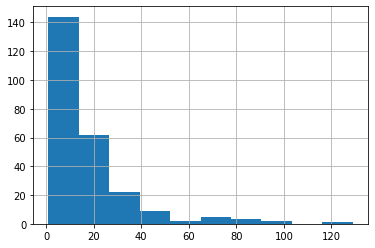

In [ ]:
df["노인요양시설"].hist() #hist는 막대그래프

df를 사분면으로 가정한 후 df를 Q3과 Q1으로 나눴습니다.
그리고 Q3-Q1을 해서 4사분면과 1사분면을 날려버리고 IQR로 지정했습니다.

In [ ]:
# q1 = df["노인요양시설"].quantile(q=0.25)
# q3 = df["노인요양시설"].quantile(q=0.75)
# IQR = q3-q1 #Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
# IQR #Interquartile range(사분위간 범위)

Y값인 노인요양시설의 3사분면과 IQR에 1.5배수 한 것을 더한 구간과 1사분면과 IQR을 1.5배수 한 것을 뺀 구간 사이를 Data_IQR로 지정했습니다.

In [ ]:
# data_IQR = df[(df["노인요양시설"] < q3 + IQR * 1.5) & (df["노인요양시설"] > q1 - IQR * 1.5)] #1.5는 약속
# data_IQR

In [ ]:
df.groupby

<bound method DataFrame.groupby of           시도  노인요양시설  공동생활가정  방문요양   방문목욕  주야간보호  복지용구
0      서울특별시       5     3.0    92   71.0   17.0  18.0
1      서울특별시       9    13.0   111  102.0   19.0  20.0
2      서울특별시       8    23.0    96   81.0   22.0   9.0
3      서울특별시      20    14.0   185  144.0   31.0  30.0
4      서울특별시      10    19.0   120  103.0   26.0  13.0
..       ...     ...     ...   ...    ...    ...   ...
245     경상남도      10     4.0    54   33.0    9.0   4.0
246     경상남도       9     0.0    25   19.0   12.0   0.0
247     경상남도       6     0.0    23   13.0    7.0   4.0
248  제주특별자치도      19     2.0    24   19.0   20.0   4.0
249  제주특별자치도      42     8.0    84   64.0   48.0  24.0

[250 rows x 7 columns]>

생각해보니까 비정상적으로 영향을 줄만큼 엄청 큰 요양시설이 없을것 같아서 주석처리 했습니다.

폰트 설치했습니다.

In [ ]:
!sudo apt-get install -y fonts-nanum #폰트 다운로드 리눅스 명령어
!sudo fc-cache -f -vv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #폰트 지정

seaborn 패키지의 sns로 이상치 제거한 Y값(노인요양시설의 수) 그래프를 이전 그래프와 비교했습니다.

이것도 주석처리 했습니다.

In [ ]:
import seaborn as sns

In [ ]:
# fig, ax = plt.subplots(ncols=2, figsize=(10,10))
# sns.histplot(df["노인요양시설"], ax=ax[0])
# sns.histplot(data_IQR["노인요양시설"], ax=ax[1])

# 회귀분석모델 돌려보기

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

로그 씌워서 정규분포 모양으로 만들었습니다.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


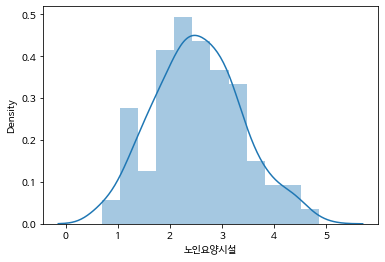

In [ ]:
import numpy as np

df["노인요양시설"] = np.log1p(df["노인요양시설"])
sns.distplot(df["노인요양시설"])

knn 모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = df["노인요양시설"]

In [ ]:
#numeric value(Y)

import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train  = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2, p=1)
#p : int, default=2
#Power parameter for the Minkowski metric. When p = 1, 
#this is equivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance 

knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))


accuracy: 0.820
RMSE: 0.624


선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()

# 학습
model.fit(X, Y)

# 예측
print(model.predict(X))

[2.47014015 2.85985965 3.0460617  3.2330563  3.09221562 2.60845305
 2.48079431 2.41318504 3.17339741 3.68773949 3.26753599 2.34490155
 2.31963337 2.484893   2.10427103 2.22975459 2.61477743 2.81596622
 2.82590193 2.74502586 2.02652659 2.95461389 1.95463512 1.95369724
 3.72134493 2.0007037  2.36337935 2.35656215 2.11913981 2.01095773
 2.3372392  2.2027744  2.50305027 2.20208079 2.43005296 1.87768982
 2.02592441 2.32086378 2.04067899 1.92010985 2.68811812 2.75967127
 4.13526843 2.8553889  3.82882759 4.31919031 3.0092661  3.02025475
 2.1681995  2.17293257 2.90067575 4.27148422 1.98255903 2.92066146
 2.89232802 3.2229943  2.77856448 1.8024068  2.21886092 2.97610404
 2.36429121 2.16222777 3.69343716 2.30231691 2.36659037 2.87169314
 3.57794716 2.75157646 3.33367722 2.69185507 2.07618963 2.37635972
 2.76011741 2.46312425 2.38746889 2.29427097 3.46465637 2.88428424
 3.01333172 1.87895857 2.20697507 2.9700018  2.51080111 2.8314168
 3.28323446 5.79675128 2.49689167 4.83178597 2.63405922 2.34067

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

predict value
 [2.50633329 1.85739123 2.11459268 2.06315477 2.17627451 3.28633085
 1.91071515 2.77103441 2.29214823 2.3189818  1.77087635 2.59926366
 2.37659153 2.05723781 4.16361352 2.47002587 2.97528497 2.06653075
 3.29512771 2.71380374 2.51504173 4.20606004 2.05171116 2.41197835
 2.08599721 2.20336227 3.08447508 3.17572967 1.95797678 2.31505876
 1.95039332 3.39038563 3.91869591 3.80886958 3.22765856 1.94358588
 1.86828782 2.58361908 1.97195299 1.80422448 1.90418767 2.32162169
 2.78246564 3.05049084 2.33673507 3.19097976 2.00415432 3.7619233
 2.34770553 2.0187616  2.3783208  2.77522975 2.03913214 2.2966811
 2.95470278 3.36531254 3.14128552 2.7953417  2.12604524 2.22359617
 1.96554379 2.3931372  2.38288895 2.3163281  2.27888285 1.97599571
 2.22268763 3.84278628 2.98374163 2.60161693 1.91226301 2.59239134
 2.27674909 2.58429742 3.30933394]
train R2 : 0.526
train R2 : 0.599
RMSE: 0.560
절편 2.511
가중치(beta) [-0.184  0.217  0.114  0.406  0.111]


# 머신러닝, 딥러닝 모델 돌려보기

In [ ]:

from matplotlib import pyplot as plt
#matplotlib: 정적, 애니메이션 및 대화형 시각화를 생성하기 위한 포괄적인 라이브러리
#pyplot:matplotlib가 MATLAB처럼 작동하도록 하는 함수 모음
from pandas import DataFrame
#pandas:오픈 소스 데이터 분석 및 조작 도구
#DataFrame:행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있으며 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
import numpy as np
#numpy:행렬/배열 처리 및 연산
from pandas import *
     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# 트레인셋 나누는 것과 칼럼트랜스포머, 스케일러 모듈 불러오기

In [ ]:
df.columns

# 칼럼 확인해보기

Index(['시도', '노인요양시설', '공동생활가정', '방문요양', '방문목욕', '주야간보호', '복지용구'], dtype='object')

인공신경망

In [ ]:
import numpy as np

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = df["노인요양시설"]

#2. train = test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
MLP_Reg_model = MLPRegressor(random_state=0, alpha=1, max_iter=1000, hidden_layer_sizes=[50, 50])
                            
#5. 모형학습 및 예측
MLP_Reg_model.fit(X_train, Y_train)
Y_pred = MLP_Reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value: \n", Y_pred)
print("tain accuracy : {:.3f}".format(MLP_Reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:3f}".format(rmse))

Y predict value: 
 [1.23741322 0.90802794 1.06818979 1.12653233 1.17306009 1.45634049
 0.97587985 1.35358912 1.20892903 1.227801   0.8750559  1.30800399
 1.26858291 1.08320712 1.57246987 1.23911391 1.36011947 1.11815248
 1.43190067 1.34745929 1.22425805 1.61264799 1.13178384 1.25736965
 1.16990962 1.13300275 1.3395167  1.36161239 1.04044369 1.18623328
 0.98439546 1.41179363 1.50092274 1.55253714 1.45048384 0.9936228
 0.92752215 1.25199389 0.99646707 0.89001846 0.94515983 1.1795405
 1.39404714 1.37297396 1.22946076 1.42094801 1.03110891 1.47171483
 1.28451918 1.02976238 1.23513275 1.34064132 1.06793424 1.20518248
 1.30318929 1.48823796 1.34673956 1.30742449 1.12473198 1.21006917
 1.04437448 1.2067596  1.32274909 1.17113734 1.20478396 1.06239993
 1.10050094 1.51813627 1.41880111 1.27494203 1.03588922 1.26979141
 1.16698321 1.25297844 1.42783853]
tain accuracy : 0.629
RMSE : 0.156132


In [ ]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,2.481646
1,1.501174
2,1.852021
3,2.129405
4,2.417891
...,...
70,1.754705
71,2.655835
72,2.290118
73,2.695030


In [ ]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["노인요양시설"])
Y_test_df

,노인요양시설
0,2.772589
1,1.609438
2,2.197225
3,2.397895
4,2.197225
...,...
70,0.693147
71,2.944439
72,2.197225
73,2.890372


matplotlib로 예측값과 실제값을 비교해봤습니다.

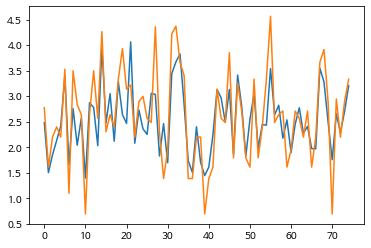

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)

딥러닝

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 딥러닝 할 때 경고문이 잘 떠서 무시하는 모듈 소환

DNN(Deep learning : Deep Neural Network)

회귀예측

In [ ]:
df.info()

# 예의상 정보 확인인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    float64
 2   공동생활가정  250 non-null    float64
 3   방문요양    250 non-null    int64  
 4   방문목욕    250 non-null    float64
 5   주야간보호   250 non-null    float64
 6   복지용구    250 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
import keras
import tensorflow as tf

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

In [ ]:
#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

#5. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=5, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))

#6. 모형 학습
model.compile(loss = "mse", optimizer = "SGD") # 확률적 경사 하강법(SGD): 
Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
print("Y predict value \n", Y_pred)

#7. 모형 평가
train_score = model.evaluate(X_train, Y_train,verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse: {:.3f}".format(train_score))
print("test mse: {:.3f}".format(test_score))

Y predict value 
 [[0.    0.023 0.    0.    0.    0.223 0.    0.    0.    0.    0.    0.
  0.    0.    0.119 0.04  0.001 0.    0.019 0.    0.103 0.    0.236 0.141
  0.    0.    0.    0.01  0.    0.    0.077 0.061 0.016 0.068 0.    0.015
  0.112 0.    0.    0.    0.022 0.045 0.    0.    0.    0.    0.    0.
  0.12  0.108 0.035 0.206 0.    0.    0.038 0.    0.    0.    0.    0.011
  0.085 0.    0.01  0.026]
 [0.    0.    0.092 0.083 0.    0.    0.149 0.    0.202 0.    0.098 0.224
  0.015 0.    0.382 0.035 0.044 0.165 0.149 0.    0.    0.    0.488 0.134
  0.    0.    0.    0.    0.    0.    0.31  0.    0.    0.09  0.    0.
  0.    0.    0.    0.26  0.045 0.    0.    0.    0.    0.    0.065 0.045
  0.    0.231 0.004 0.    0.    0.432 0.033 0.    0.284 0.438 0.    0.669
  0.    0.    0.345 0.   ]
 [0.    0.    0.005 0.077 0.    0.    0.001 0.    0.035 0.    0.    0.125
  0.003 0.02  0.162 0.111 0.    0.    0.052 0.018 0.009 0.    0.167 0.068
  0.    0.    0.    0.045 0.    0.    0.096 0.   

train mse와 test mse 확인

# 앙상블

회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 단일 모형 생성
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state=0)

#5. voting model 생성
model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

#6. 모형학습
model.fit(X_train, Y_train)

#7. 예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
Regressors = [svr, mlp]
for Regressor in Regressors :
  Regressor.fit(X_train, Y_train)
  Regressor.fit(X_train, Y_train)
  class_name = Regressor.__class__.__name__
  print("{0} accuracy : {1:3f}".format(class_name, Regressor.score(X_test, Y_test)))

Y predict value: 
 [1.22241712 1.00199898 1.05164479 1.07101018 1.10822076 1.39412378
 0.99367465 1.40555424 1.26310993 1.18984981 0.98501481 1.27660398
 1.17698296 1.07190505 1.45607499 1.22864115 1.40201418 1.07015807
 1.42341444 1.29310394 1.18074663 1.64958504 1.10195432 1.16881072
 1.10808261 1.08693418 1.45345555 1.45376475 1.01398034 1.13089735
 1.02820029 1.36350838 1.46360018 1.47799246 1.52761221 1.05154583
 0.99084958 1.12011451 1.01793357 0.9821786  1.01607345 1.19093818
 1.30726294 1.404136   1.18303552 1.53872935 1.04737449 1.40937188
 1.23757064 1.04348484 1.22979798 1.31632287 1.05060011 1.20846566
 1.3777319  1.45797499 1.37333507 1.4361098  1.09310383 1.12235993
 1.05482873 1.18800987 1.23381391 1.19517667 1.16889622 1.01938882
 1.15664282 1.45866461 1.33092056 1.24134531 1.02489379 1.30020832
 1.11151677 1.32785388 1.51329499]
voting regressor accuracy(R2) : 0.552
SVR accuracy : 0.651657
MLPRegressor accuracy : 0.252611


정확도가 전반적으로 잘 안나오고 MLP accuracy는 완전 이상합니다.

# 랜덤포레스트

회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n",Y_pred)
print("accuracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [1.30856698 0.93030031 0.99827979 1.04718516 1.21680189 1.43200692
 0.99117742 1.28672292 1.20277321 1.28208838 0.92915243 1.26730062
 1.3308438  1.07270933 1.58353624 1.25072603 1.36857917 1.16460893
 1.41267506 1.1610768  1.21686894 1.50382983 1.12785641 1.33255629
 1.15952516 1.17138888 1.40875684 1.36751568 1.01813244 1.29834187
 0.98017195 1.41007782 1.48587383 1.48951452 1.31336496 0.95748955
 0.95043787 1.29343324 0.98353896 0.94370403 0.93937345 1.2106025
 1.39096627 1.23586741 1.25149599 1.38285992 0.97084286 1.39989739
 1.29180166 0.95195184 1.29801722 1.37468299 1.10334682 1.27052046
 1.23327296 1.41337548 1.3580566  1.32740709 1.15831123 1.27210013
 1.02561827 1.23854283 1.32658141 1.26577905 1.2645037  1.11009147
 1.21721922 1.40965615 1.42949346 1.22731316 0.92499545 1.26348061
 1.228899   1.30226535 1.41066731]
accuracy(R2) : 0.751
RMSE : 0.17446802864730493


회귀모델 예측 정확도를 나타내는 R2 accuracy와 실제값과 예측값 사이의 오차를 나타내는 RMSE 모두 만족할만한 수치가 나왔습니다.

# 그래디언트 회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

#5. 모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value: 
 [1.2580717  0.86482042 0.96491322 1.14170781 1.29502783 1.47149668
 1.0337369  1.25658315 1.22562039 1.18668999 0.77555741 1.25096794
 1.31926855 1.04020135 1.75348333 1.22686103 1.29500922 1.11221856
 1.44283713 1.13125098 1.26867844 1.45929688 1.07810839 1.31096187
 1.09097652 1.14982738 1.35482527 1.33112886 0.96685906 1.34619221
 1.10437018 1.43238658 1.50855004 1.6113445  1.30938467 1.03317638
 0.90205912 1.40461506 0.84552759 0.87567408 0.91676568 1.20786915
 1.44478027 1.16587304 1.20414474 1.43168    0.91923795 1.4751824
 1.24605793 0.97634745 1.3554165  1.40405043 1.07807004 1.12850943
 1.1872492  1.40062148 1.33768377 1.32154754 1.15423592 1.30391409
 1.03232979 1.14861347 1.31625296 1.27704497 1.16495558 1.0007692
 1.28992495 1.4159136  1.435315   1.22308193 0.76688187 1.21941287
 1.21859335 1.25674621 1.44324902]
accuracy(test) : 0.528
RMSE : 0.18119587938161877


인공신경망 채택

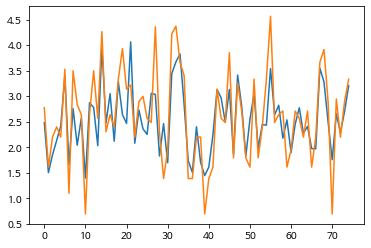

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)